In [1]:
#convert
!jupyter nbconvert --to html /content/drive/MyDrive/folder/Math448Project.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/folder/Math448Project.ipynb to html
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/widgetsdatatypefilter.py:71: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  warn(
[NbConvertApp] Writing 1883608 bytes to /content/drive/MyDrive/folder/Math448Project.html


In [1]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.3/802.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 3.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 16.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from ISLP import load_data
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from functools import partial
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)
!pip install l0bnb
from l0bnb import fit_path
from google.colab import drive
%cd /content/drive/MyDrive/Colab Notebooks
from ISLP import confusion_table
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 852.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for l0bnb: filename=l0bnb-1.0.0-py3-none-any.whl size=22297 sha256=765fafe837c9e465520fd367ef6f7a585e457d45cdf92b3ab012b93a8d9eb0bd
  Stored in directory: /root/.cache/pip/wheels/db/c7/a3/a2e42159dcc85eeb004a84772e1884c45f88d43fac0075de19
Successfully built l0bnb
/content/drive/MyDrive/Colab Notebooks


In [2]:
challenger = pd.read_csv('Challenger_Ranked_Games.csv')
challenger
#len(challenger)

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,4143231833,1468,0,1,0,0,0,0,1,0,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,4157911901,970,0,1,1,0,1,0,3,0,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,3764171638,1480,0,1,1,0,1,0,1,0,...,34,55214,48849,636,66,13.2,175,6,25448,27675
26902,4110201724,1837,1,1,0,0,1,0,3,0,...,29,88366,52625,660,70,14.0,168,5,25003,45455


In [3]:
challenger.shape[1]

50

In [4]:
challenger['gameDuraton']=challenger['gameDuraton']/60
challenger

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,22.050000,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,21.950000,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,15.533333,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,34.966667,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,39.066667,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,4143231833,24.466667,0,1,0,0,0,0,1,0,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,4157911901,16.166667,0,1,1,0,1,0,3,0,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,3764171638,24.666667,0,1,1,0,1,0,1,0,...,34,55214,48849,636,66,13.2,175,6,25448,27675
26902,4110201724,30.616667,1,1,0,0,1,0,3,0,...,29,88366,52625,660,70,14.0,168,5,25003,45455


In [5]:
time = challenger['gameDuraton']>=15
challenger = challenger[time]

In [6]:
challenger = challenger[['gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt']]

In [7]:
challenger['blueWins']

0        0
1        1
2        0
3        0
4        1
        ..
26899    0
26900    0
26901    0
26902    1
26903    1
Name: blueWins, Length: 25443, dtype: int64

In [8]:
challenger.shape[0]

25443

In [9]:
challenger.describe()

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
count,25443.000000,25443.000000,25443.000000,25443.000000,25443.000000,25443.000000,25443.000000,25443.000000,25443.000000,25443.000000,...,25443.000000,25443.000000,25443.000000,25443.000000,25443.000000,25443.000000,25443.000000,25443.000000,25443.000000,25443.000000
mean,24.919492,0.501356,0.505208,0.533349,0.257988,0.418543,0.368903,1.454467,0.324529,4.522580,...,24.622136,40.642220,71903.810203,49350.167551,540.678733,66.324726,135.478128,5.652242,26011.477184,40009.349526
std,6.358723,0.500008,0.499983,0.498896,0.437536,0.493330,0.482517,1.245288,0.547104,3.308294,...,12.735201,27.304251,34970.023937,14549.276142,156.923045,12.401729,61.113176,3.434640,14876.551129,25982.490195
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,10336.000000,17697.000000,69.000000,32.000000,0.000000,0.000000,2357.000000,0.000000
25%,20.183333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,15.000000,21.000000,45451.000000,38497.500000,435.000000,57.000000,97.000000,3.000000,15121.000000,17705.000000
50%,24.433333,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,...,23.000000,36.000000,66703.000000,48960.000000,544.000000,66.000000,136.000000,5.000000,22895.000000,37077.000000
75%,29.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,7.000000,...,32.000000,53.000000,91655.000000,59169.500000,646.000000,75.000000,176.000000,7.000000,33459.000000,59243.500000
max,55.016667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,11.000000,...,102.000000,238.000000,333957.000000,121920.000000,1267.000000,132.000000,402.000000,29.000000,162442.000000,167692.000000


In [10]:
challenger_train = challenger[80:]

In [11]:
challenger_test = challenger[20:]

In [12]:
challenger_train

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
82,30.516667,0,0,0,0,0,0,2,0,2,...,32,51,80667,53325,699,70,145,5,48371,40057
83,22.683333,1,1,1,0,0,1,1,0,9,...,21,36,58810,48846,542,63,119,7,18742,55957
84,25.450000,1,1,1,1,1,0,3,1,5,...,20,49,69511,54203,595,68,191,8,26436,65245
85,29.916667,1,1,1,1,1,1,4,2,9,...,22,72,97473,62783,600,77,182,9,61823,96215
86,27.266667,1,1,0,1,1,1,1,1,8,...,9,48,51747,53237,685,69,161,4,15091,47892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,24.466667,0,1,0,0,0,0,1,0,0,...,28,50,99418,41437,438,60,106,8,20122,13309
26900,16.166667,0,1,1,0,1,0,3,0,5,...,42,36,61816,61221,346,65,28,5,32837,44640
26901,24.666667,0,1,1,0,1,0,1,0,4,...,20,19,51604,45013,568,63,132,4,18131,45242
26902,30.616667,1,1,0,0,1,0,3,0,5,...,19,66,93059,58160,640,76,168,7,75427,60486


#Visuals

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

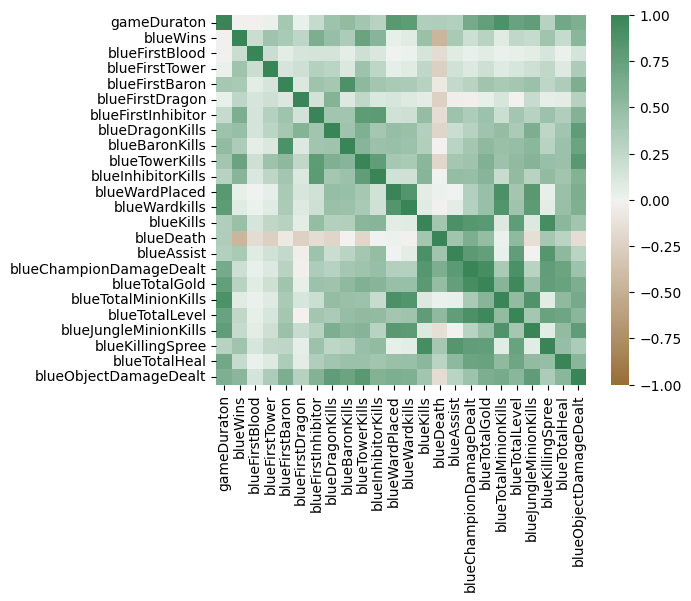

In [14]:
correlation_challenger = challenger.corr()

axis_corr = sns.heatmap(
correlation_challenger,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

The average match time is 25 mintues long, does a longer match affect winrate?

In [15]:
rs = np.random.RandomState(0)
corr = challenger.corr()
corr.style.background_gradient(cmap='coolwarm')

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
gameDuraton,1.000000,-0.009446,-0.012591,0.016069,0.383120,0.029436,0.220773,0.442732,0.504711,0.410011,0.298062,0.821061,0.788882,0.337972,0.346396,0.326829,0.663415,0.755037,0.876027,0.719623,0.768595,0.302889,0.683576,0.613080
blueWins,-0.009446,1.000000,0.197562,0.432927,0.378926,0.264201,0.632641,0.482959,0.366864,0.716779,0.552783,0.034874,0.071877,0.463514,-0.457035,0.379339,0.181935,0.290011,0.074931,0.245769,0.221614,0.424761,0.221167,0.543217
blueFirstBlood,-0.012591,0.197562,1.000000,0.198910,0.057821,0.129560,0.135082,0.135491,0.047202,0.173935,0.112806,0.002060,0.008959,0.127656,-0.157544,0.076107,0.027870,0.062702,0.020048,0.037190,0.054732,0.118517,0.015921,0.136418
blueFirstTower,0.016069,0.432927,0.198910,1.000000,0.130743,0.178601,0.317245,0.278425,0.107445,0.444409,0.267690,0.043025,0.076318,0.251269,-0.255120,0.158935,0.100118,0.175746,0.079486,0.123886,0.177146,0.242939,0.088633,0.361009
blueFirstBaron,0.383120,0.378926,0.057821,0.130743,1.000000,0.105739,0.437236,0.388599,0.877762,0.530607,0.408229,0.381430,0.367460,0.297150,-0.070812,0.241650,0.296552,0.425470,0.375299,0.405709,0.459898,0.261306,0.358868,0.629980
blueFirstDragon,0.029436,0.264201,0.129560,0.178601,0.105739,1.000000,0.151671,0.574369,0.097583,0.243213,0.102882,0.122185,0.091537,0.061728,-0.245110,-0.032967,-0.023627,0.037366,0.122975,-0.007741,0.214143,0.043547,0.058359,0.304904
blueFirstInhibitor,0.220773,0.632641,0.135082,0.317245,0.437236,0.151671,1.000000,0.421744,0.418973,0.783933,0.794106,0.158283,0.179352,0.495227,-0.149683,0.439500,0.358664,0.449168,0.189321,0.411834,0.300894,0.448532,0.341681,0.581761
blueDragonKills,0.442732,0.482959,0.135491,0.278425,0.388599,0.574369,0.421744,1.000000,0.431788,0.608159,0.395890,0.485758,0.465582,0.321077,-0.215586,0.197531,0.301024,0.436121,0.498984,0.368809,0.627031,0.271711,0.420431,0.774788
blueBaronKills,0.504711,0.366864,0.047202,0.107445,0.877762,0.097583,0.418973,0.431788,1.000000,0.549801,0.456614,0.473907,0.449843,0.332531,-0.004265,0.284593,0.393212,0.522353,0.466490,0.489714,0.537552,0.291884,0.456059,0.708697
blueTowerKills,0.410011,0.716779,0.173935,0.444409,0.530607,0.243213,0.783933,0.608159,0.549801,1.000000,0.769937,0.385718,0.376141,0.539563,-0.208225,0.401229,0.431391,0.593612,0.447320,0.511357,0.556001,0.474384,0.459747,0.825984


In [16]:
challenger_new = challenger[['gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
        'blueFirstDragon',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueTotalHeal',
       'blueObjectDamageDealt']]

In [17]:
challenger_new_train = challenger_new[80:]
challenger_new_test = challenger_new[20:]

#Logistic Regression

In [18]:
allvars = challenger_train.drop(columns = ['blueWins'])
design = MS(allvars)
X = design.fit_transform(challenger_train)
y = challenger_train.blueWins == 1
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,3.030000,0.439000,6.904,0.000
gameDuraton,-0.477300,0.024000,-20.185,0.000
blueFirstBlood,-0.375800,0.083000,-4.547,0.000
blueFirstTower,-0.348300,0.088000,-3.959,0.000
blueFirstBaron,-0.623800,0.162000,-3.843,0.000
blueFirstDragon,-0.034800,0.103000,-0.336,0.737
blueFirstInhibitor,-0.139100,0.127000,-1.095,0.274
blueDragonKills,0.583400,0.061000,9.615,0.000
blueBaronKills,1.529500,0.148000,10.355,0.000
blueTowerKills,0.969300,0.037000,26.336,0.000


In [19]:
results.params

intercept                  3.029961
gameDuraton               -0.477349
blueFirstBlood            -0.375768
blueFirstTower            -0.348295
blueFirstBaron            -0.623827
blueFirstDragon           -0.034781
blueFirstInhibitor        -0.139069
blueDragonKills            0.583402
blueBaronKills             1.529533
blueTowerKills             0.969305
blueInhibitorKills         0.476429
blueWardPlaced            -0.012180
blueWardkills              0.001911
blueKills                  0.176730
blueDeath                 -0.307689
blueAssist                 0.032627
blueChampionDamageDealt    0.000018
blueTotalGold              0.000014
blueTotalMinionKills       0.007963
blueTotalLevel             0.017927
blueJungleMinionKills     -0.000665
blueKillingSpree          -0.013693
blueTotalHeal              0.000009
blueObjectDamageDealt     -0.000031
dtype: float64

In [20]:
results.pvalues

intercept                   5.042204e-12
gameDuraton                 1.313515e-90
blueFirstBlood              5.443814e-06
blueFirstTower              7.541712e-05
blueFirstBaron              1.213475e-04
blueFirstDragon             7.366055e-01
blueFirstInhibitor          2.736734e-01
blueDragonKills             6.886034e-22
blueBaronKills              3.972862e-25
blueTowerKills             7.519426e-153
blueInhibitorKills          9.385959e-09
blueWardPlaced              7.979807e-05
blueWardkills               7.200016e-01
blueKills                   1.794285e-48
blueDeath                   0.000000e+00
blueAssist                  8.147150e-19
blueChampionDamageDealt     2.497379e-08
blueTotalGold               3.710604e-01
blueTotalMinionKills        1.776391e-19
blueTotalLevel              1.109588e-01
blueJungleMinionKills       6.893798e-01
blueKillingSpree            6.252157e-01
blueTotalHeal               1.067227e-02
blueObjectDamageDealt       4.880019e-11
dtype: float64

In [21]:
challenger_train = challenger_train.replace({'blueWins':{1: 'win', 0:'lose'}})

In [22]:
challenger_train

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
82,30.516667,lose,0,0,0,0,0,2,0,2,...,32,51,80667,53325,699,70,145,5,48371,40057
83,22.683333,win,1,1,0,0,1,1,0,9,...,21,36,58810,48846,542,63,119,7,18742,55957
84,25.450000,win,1,1,1,1,0,3,1,5,...,20,49,69511,54203,595,68,191,8,26436,65245
85,29.916667,win,1,1,1,1,1,4,2,9,...,22,72,97473,62783,600,77,182,9,61823,96215
86,27.266667,win,1,0,1,1,1,1,1,8,...,9,48,51747,53237,685,69,161,4,15091,47892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,24.466667,lose,1,0,0,0,0,1,0,0,...,28,50,99418,41437,438,60,106,8,20122,13309
26900,16.166667,lose,1,1,0,1,0,3,0,5,...,42,36,61816,61221,346,65,28,5,32837,44640
26901,24.666667,lose,1,1,0,1,0,1,0,4,...,20,19,51604,45013,568,63,132,4,18131,45242
26902,30.616667,win,1,0,0,1,0,3,0,5,...,19,66,93059,58160,640,76,168,7,75427,60486


In [23]:
probs = results.predict()
probs[:10]

array([0.0036257 , 0.99729737, 0.97279618, 0.99994737, 0.99895206,
       0.00161371, 0.77926153, 0.99012132, 0.81064748, 0.00913618])

In [24]:
labels = np.array(['lose']*25363 )
labels[probs>0.5] = 'win'

In [25]:
confusion_table(labels, challenger_train.blueWins)

Truth,lose,win
Predicted,,
lose,12225,372
win,424,12342


In [26]:
(12225+12342)/25363, np.mean(labels == challenger_train.blueWins)

(0.9686157000354848, 0.9686157000354848)

In [27]:
allvars = challenger_new_train.drop(columns = ['blueWins'])
design = MS(allvars)
X = design.fit_transform(challenger_new_train)
y = challenger_new_train.blueWins == 1
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,3.600600,0.218000,16.506,0.000
gameDuraton,-0.282300,0.014000,-20.478,0.000
blueFirstBlood,-0.433200,0.080000,-5.428,0.000
blueFirstTower,-0.336300,0.084000,-3.983,0.000
blueFirstDragon,-0.128300,0.099000,-1.292,0.196
blueDragonKills,0.549500,0.058000,9.455,0.000
blueBaronKills,1.108000,0.096000,11.567,0.000
blueTowerKills,0.931300,0.033000,27.950,0.000
blueInhibitorKills,0.563400,0.066000,8.532,0.000
blueWardkills,0.007600,0.005000,1.646,0.100


In [28]:
probs = results.predict()
probs[:10]

array([0.00281598, 0.99761904, 0.96879944, 0.99993979, 0.99807782,
       0.00212271, 0.80075778, 0.97253504, 0.70564364, 0.00534807])

In [29]:
challenger_train = challenger_train.replace({'blueWins':{1: 'win', 0:'lose'}})

In [30]:
labels = np.array(['lose']*25363)
labels[probs>0.5] = 'win'

In [31]:
confusion_table(labels, challenger_train.blueWins)

Truth,lose,win
Predicted,,
lose,12204,403
win,445,12311


In [32]:
(12204+12311)/25363

0.9665654693845366

In [33]:
challenger_new = challenger[['gameDuraton','blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueKills',
       'blueDeath', 'blueAssist',
       'blueJungleMinionKills',
       'blueObjectDamageDealt']]

In [34]:
challenger_new.shape[0]

25443

#LDA

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [36]:
y = challenger['blueWins']
X = challenger.drop(columns = ['blueWins'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [37]:
challenger = challenger.replace({'blueWins':{1: 'win', 0:'lose'}})

In [38]:
clf = LDA(store_covariance = True)
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [39]:
clf.means_

array([[2.49879045e+01, 4.06222222e-01, 3.16246914e-01, 9.27407407e-02,
        2.87604938e-01, 6.25185185e-02, 8.56296296e-01, 1.25037037e-01,
        2.14804938e+00, 1.25728395e-01, 6.02947160e+01, 2.24625185e+01,
        1.88109630e+01, 3.05221728e+01, 3.03848889e+01, 6.57642484e+04,
        4.51940385e+04, 5.28988938e+02, 6.33268148e+01, 1.22030025e+02,
        4.20434568e+00, 2.27347370e+04, 2.59180347e+04],
       [2.48173005e+01, 5.98005670e-01, 7.47091602e-01, 4.21155538e-01,
        5.48147424e-01, 6.69762440e-01, 2.05142243e+00, 5.21458598e-01,
        6.87027080e+00, 1.12660084e+00, 6.24422720e+01, 2.45957572e+01,
        3.03978884e+01, 1.87471894e+01, 5.07153192e+01, 7.78546190e+04,
        5.34430573e+04, 5.51908789e+02, 6.92562323e+01, 1.48869586e+02,
        7.07879558e+00, 2.91864797e+04, 5.39797977e+04]])

In [40]:
clf.classes_

array([0, 1])

In [41]:
clf.priors_

array([0.49744522, 0.50255478])

In [42]:
lda_pred = clf.predict(X_test)

In [43]:
confusion_table(y_test, lda_pred)

Truth,0,1
Predicted,,
0,2481,81
1,95,2432


In [44]:
(2562+2344)/5381

0.9117264448987177

LDA with some features removed

In [45]:
y = challenger_new['blueWins']
X = challenger_new.drop(columns = ['blueWins'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [46]:
challenger_new = challenger_new.replace({'blueWins':{1: 'win', 0:'lose'}})

In [47]:
clf = LDA(store_covariance = True)
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [48]:
clf.means_

array([[2.49889623e+01, 4.06918301e-01, 3.13885878e-01, 9.09628462e-02,
        6.29742781e-02, 8.50891889e-01, 1.22499261e-01, 2.14240662e+00,
        1.25160146e-01, 6.04175618e+01, 1.87579580e+01, 3.04475214e+01,
        3.03072829e+01, 1.21892481e+02, 2.58954819e+04],
       [2.49187029e+01, 6.09777604e-01, 7.44097188e-01, 4.23826786e-01,
        6.75222886e-01, 2.05937102e+00, 5.26991280e-01, 6.91123739e+00,
        1.13980602e+00, 6.27057901e+01, 3.04881944e+01, 1.88517684e+01,
        5.09381797e+01, 1.49570295e+02, 5.42512892e+04]])

In [49]:
clf.priors_

array([0.49852609, 0.50147391])

In [50]:
lda_pred = clf.predict(X_test)

In [51]:
confusion_table(y_test, lda_pred)

Truth,0,1
Predicted,,
0,2443,97
1,80,2469


In [52]:
(2478+2432)/5089

0.9648260955000982

#QDA

In [53]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [54]:
y = challenger['blueWins']
X = challenger.drop(columns = ['blueWins'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [55]:
qda = QDA(store_covariance=True)
clf = QDA(store_covariance = True)
clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [56]:
qda_pred = clf.predict(X_test)

In [57]:
confusion_table(y_test, qda_pred)

Truth,lose,win
Predicted,,
lose,2316,236
win,38,2499


In [58]:
(2330+2486)/5381

0.8950009291953168

In [59]:
y = challenger_new['blueWins']
X = challenger_new.drop(columns = ['blueWins'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [60]:
qda = QDA(store_covariance=True)
clf = QDA(store_covariance = True)
clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [61]:
qda_pred = clf.predict(X_test)

In [62]:
confusion_table(y_test, qda_pred)

Truth,lose,win
Predicted,,
lose,2299,234
win,42,2514


In [63]:
(2287+2503)/5089

0.9412458243269798

#Ridge Alpha

#Ridge Regression

In [64]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifierCV
challenger['blueWins']=pd.get_dummies(challenger['blueWins'], drop_first=True)
y = challenger['blueWins']
X = challenger.drop(columns = ['blueWins'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)


In [65]:
ridge = Ridge(alpha = 10.0)

In [66]:
clf = RidgeClassifierCV().fit(X_train, y_train)
clf.score(X_test, y_test)

0.9658086067989782

In [67]:
clf.alpha_

10.0

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [69]:
alphas = 10**np.linspace(10,-2,100)*0.5
w = list()
for a in alphas:
    ridge_clf = RidgeCV(alphas=[a],cv=10).fit(X, y)
    w.append(ridge_clf.coef_)

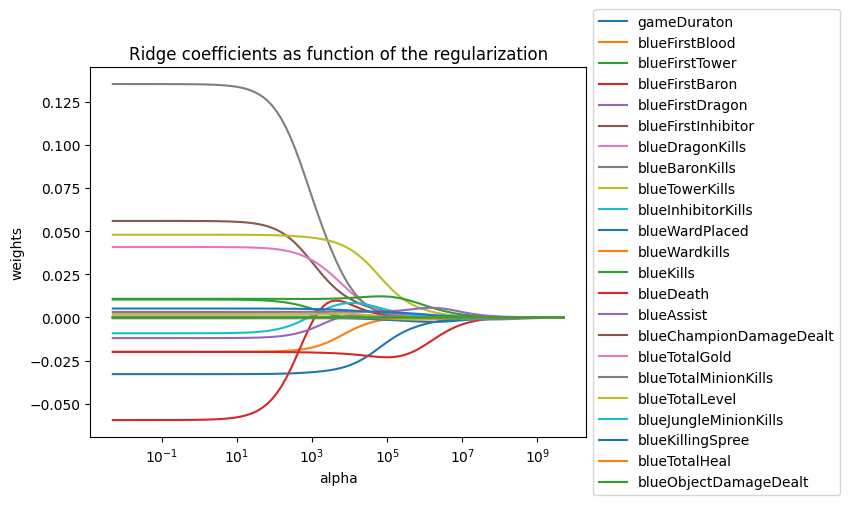

In [70]:
w = np.array(w)
plt.semilogx(alphas,w)
plt.title('Ridge coefficients as function of the regularization')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(X.keys(), loc = 'center left', bbox_to_anchor=(1, 0.5))

In [71]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifierCV
challenger_new['blueWins']=pd.get_dummies(challenger_new['blueWins'], drop_first=True)
y = challenger_new['blueWins']
y = pd.get_dummies(y, drop_first=True)
X = challenger_new.drop(columns = ['blueWins'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)


In [72]:
clf = RidgeClassifierCV().fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9579485164079387

In [73]:
clf.alpha_

10.0

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

#Lasso Attempt 2

In [75]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
y = challenger['blueWins']
X = challenger.drop(columns = ['blueWins'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [76]:
clf = LogisticRegression(penalty = 'l1', random_state= 0, solver = 'saga').fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [77]:
clf.score(X_test, y_test)

0.7885635684810375

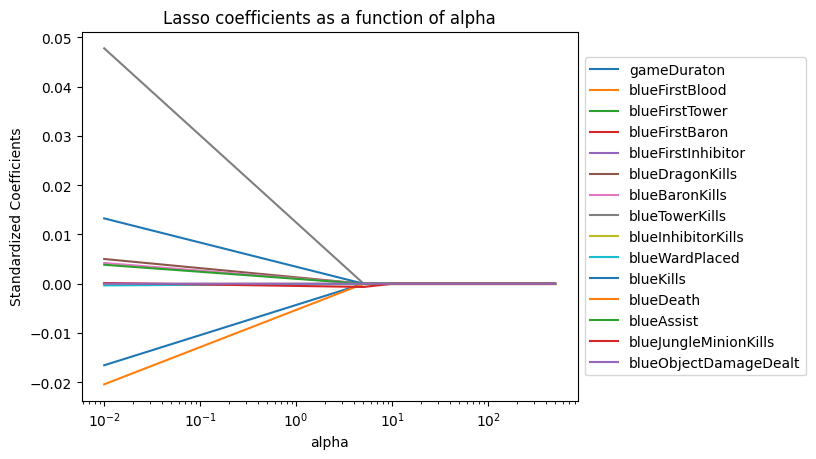

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
#lasso = LogisticRegression(penalty = 'l1', random_state= 0, solver = 'saga')
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.legend(X.keys(), loc = 'center left', bbox_to_anchor=(1, 0.5))
plt.title('Lasso coefficients as a function of alpha');

In [79]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
y = challenger_new['blueWins']
X = challenger_new.drop(columns = ['blueWins'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [80]:
clf = LogisticRegression(penalty = 'l1', random_state= 0, solver = 'saga').fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [81]:
clf.score(X_test, y_test)

0.6496364708194144

#Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [83]:
y = challenger['blueWins']
X = challenger.drop(columns = ['blueWins'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [84]:
metrics.accuracy_score(y_test, y_pred)

0.9565730005895068

In [85]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [86]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART

In [87]:
feature_names = list(X_train.columns)

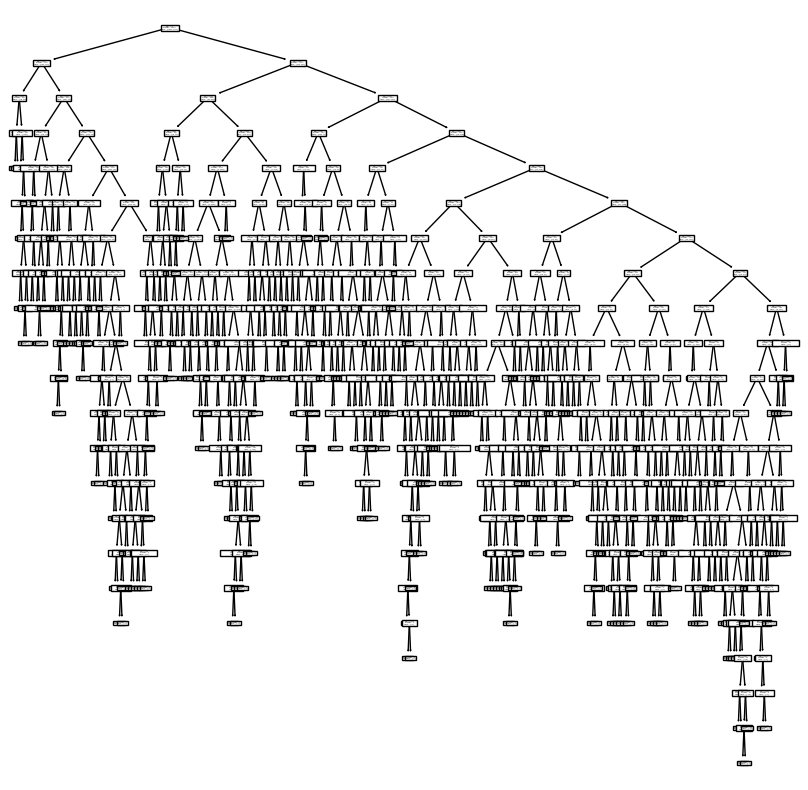

In [88]:
ax = subplots(figsize=(10,10))[1]
plot_tree(clf,
          feature_names=feature_names,
          ax=ax);

with removed features

In [89]:
y = challenger_new['blueWins']
X = challenger_new.drop(columns = ['blueWins'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [90]:
metrics.accuracy_score(y_test, y_pred)

0.953232462173315

In [91]:
feature_names = list(X_train.columns)

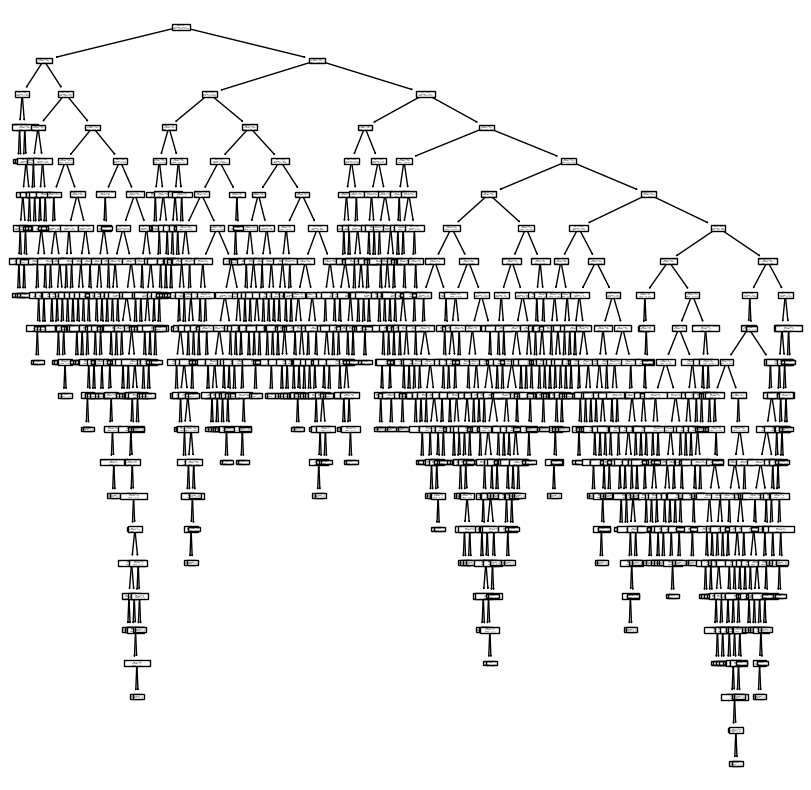

In [92]:
ax = subplots(figsize=(10,10))[1]
plot_tree(clf,
          feature_names=feature_names,
          ax=ax);

#Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [94]:
y = challenger['blueWins']
X = challenger.drop(columns = ['blueWins'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9697386519944979

In [95]:
feature_names = list(X_train.columns)


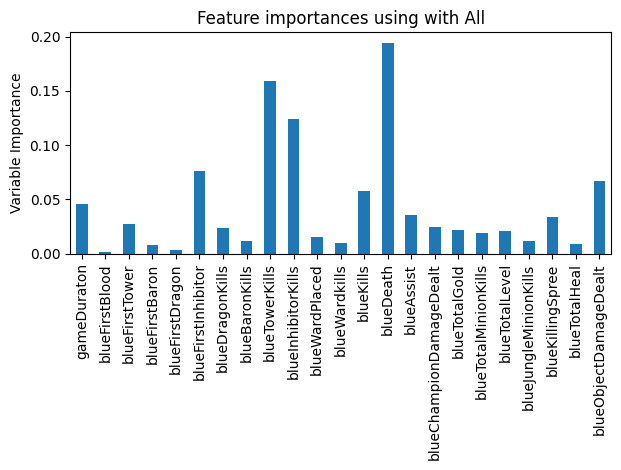

In [96]:
impotances = clf.feature_importances_
forest_importances = pd.Series(impotances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using with All")
ax.set_ylabel("Variable Importance")
fig.tight_layout()

In [97]:
y = challenger_new['blueWins']
X = challenger_new.drop(columns = ['blueWins'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9730791904106897

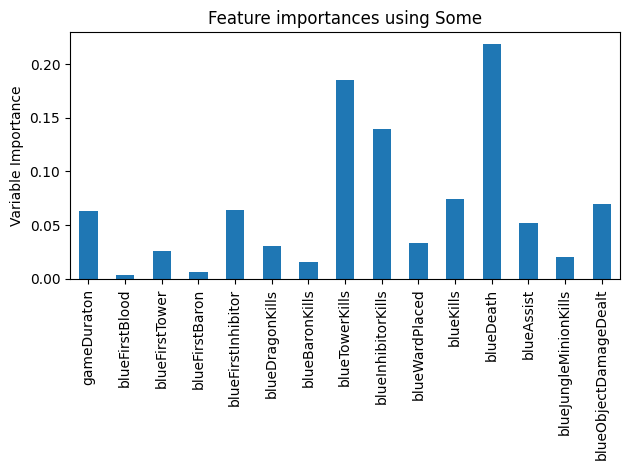

In [98]:
feature_names = list(X_train.columns)
impotances = clf.feature_importances_
forest_importances = pd.Series(impotances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using Some")
ax.set_ylabel("Variable Importance")
fig.tight_layout()